# ANÁLISE EXPLORATÓRIA E TRATAMENTO DOS DADOS

### Importando a base de dados e as bibliotecas utilizadas

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go 
from biokit.viz import corrplot
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

wine = pd.read_csv('Wine.csv')
wine = wine.rename(columns = {'Alcohol' : 'Alcool', 'Ash' : 'Po', 'Ash_Alcanity': 'Alcalinidade_po',
                          'Magnesium' : 'Magnesio','Total_Phenols' : 'Total_Fenois',
                          'Nonflavanoid_Phenols':'Fenois_nao_flavalonoides','Color_Intensity':'Intensidade_de_cor', 'Flavanoids': 'Flavanoides'})
wine.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoides,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


### Dados do DataSet

In [35]:
wine.info()
# Sem valores nulos e todos os dados são numéricos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alcool                    178 non-null    float64
 1   Malic_Acid                178 non-null    float64
 2   Po                        178 non-null    float64
 3   Alcalinidade_po           178 non-null    float64
 4   Magnesio                  178 non-null    int64  
 5   Total_Fenois              178 non-null    float64
 6   Flavanoides               178 non-null    float64
 7   Fenois_nao_flavalonoides  178 non-null    float64
 8   Proanthocyanins           178 non-null    float64
 9   Intensidade_de_cor        178 non-null    float64
 10  Hue                       178 non-null    float64
 11  OD280                     178 non-null    float64
 12  Proline                   178 non-null    int64  
 13  Customer_Segment          178 non-null    int64  
dtypes: float64

In [36]:
wine.describe()

# Como algumas grandezas variam de forma muito diferente (alcool e proline, por exemplo), será necessário normalizar as amostras de 
# dados para cada variável, de modo que o intervalo de variação (min - max) sejam iguais para todos os atributos do dataset.

# Pode-se notar que talvez haja alguma relação entre Total_fenois e Flavanoides, de modo que não seja necessário utilizar estas duas variáveis 
# (simultaneamente) para realizar os agrupamentos.

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoides,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


### Correlação entre variáveis

In [37]:
# Indica a relação entre os atributos, para saber quais são realmente fundamentais para o dataframe.
matriz_corr = wine.corr()
matriz_corr

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoides,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
Alcool,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Po,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinidade_po,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesio,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Fenois,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoides,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Fenois_nao_flavalonoides,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Intensidade_de_cor,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


c:\Users\joaop\AppData\Local\Programs\Python\Python310\lib\site-packages\biokit\viz\corrplot.py:268: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.

C:\Users\joaop\AppData\Local\Temp\ipykernel_16964\732328896.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



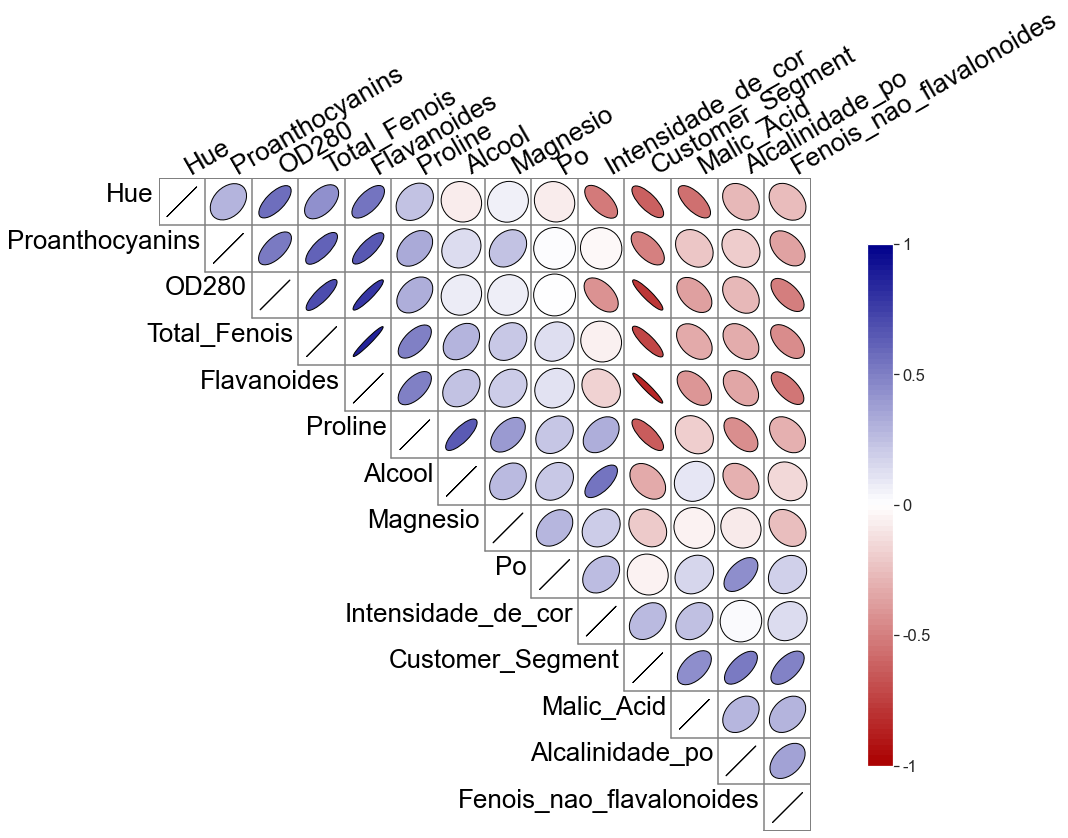

In [38]:
# Para visualizar de forma gráfica, utilizaremos a biblioteca biokit:
corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper = 'ellipse', fontsize = 'x-large')
fig = plt.gcf()
fig.set_size_inches(20, 12)
fig.show()

# Dois atributos com correlação positiva variam da mesma maneira: se um aumenta, o outro aumenta.
# Dois atributos com correlação negativa variam de maneira contrária: se um aumenta, o outro diminui.
# Quanto mais próximo de uma linha reta, maior é a correlação (em módulo) dos dois atributos.
# OBS: Importante lembrar que correlação não implica em causalidade.

# Confirmando nossa hipotese: total_flavanoides e flavanoides são muito relcionados entre si.
# Removendo um desses dois atributos, podemos reduzir informações reduntantes de modo a otimizar os resultados obtidos com nossos modelos de ML,
# além de exigir uma menor capacidade de processamento e armazenamento.

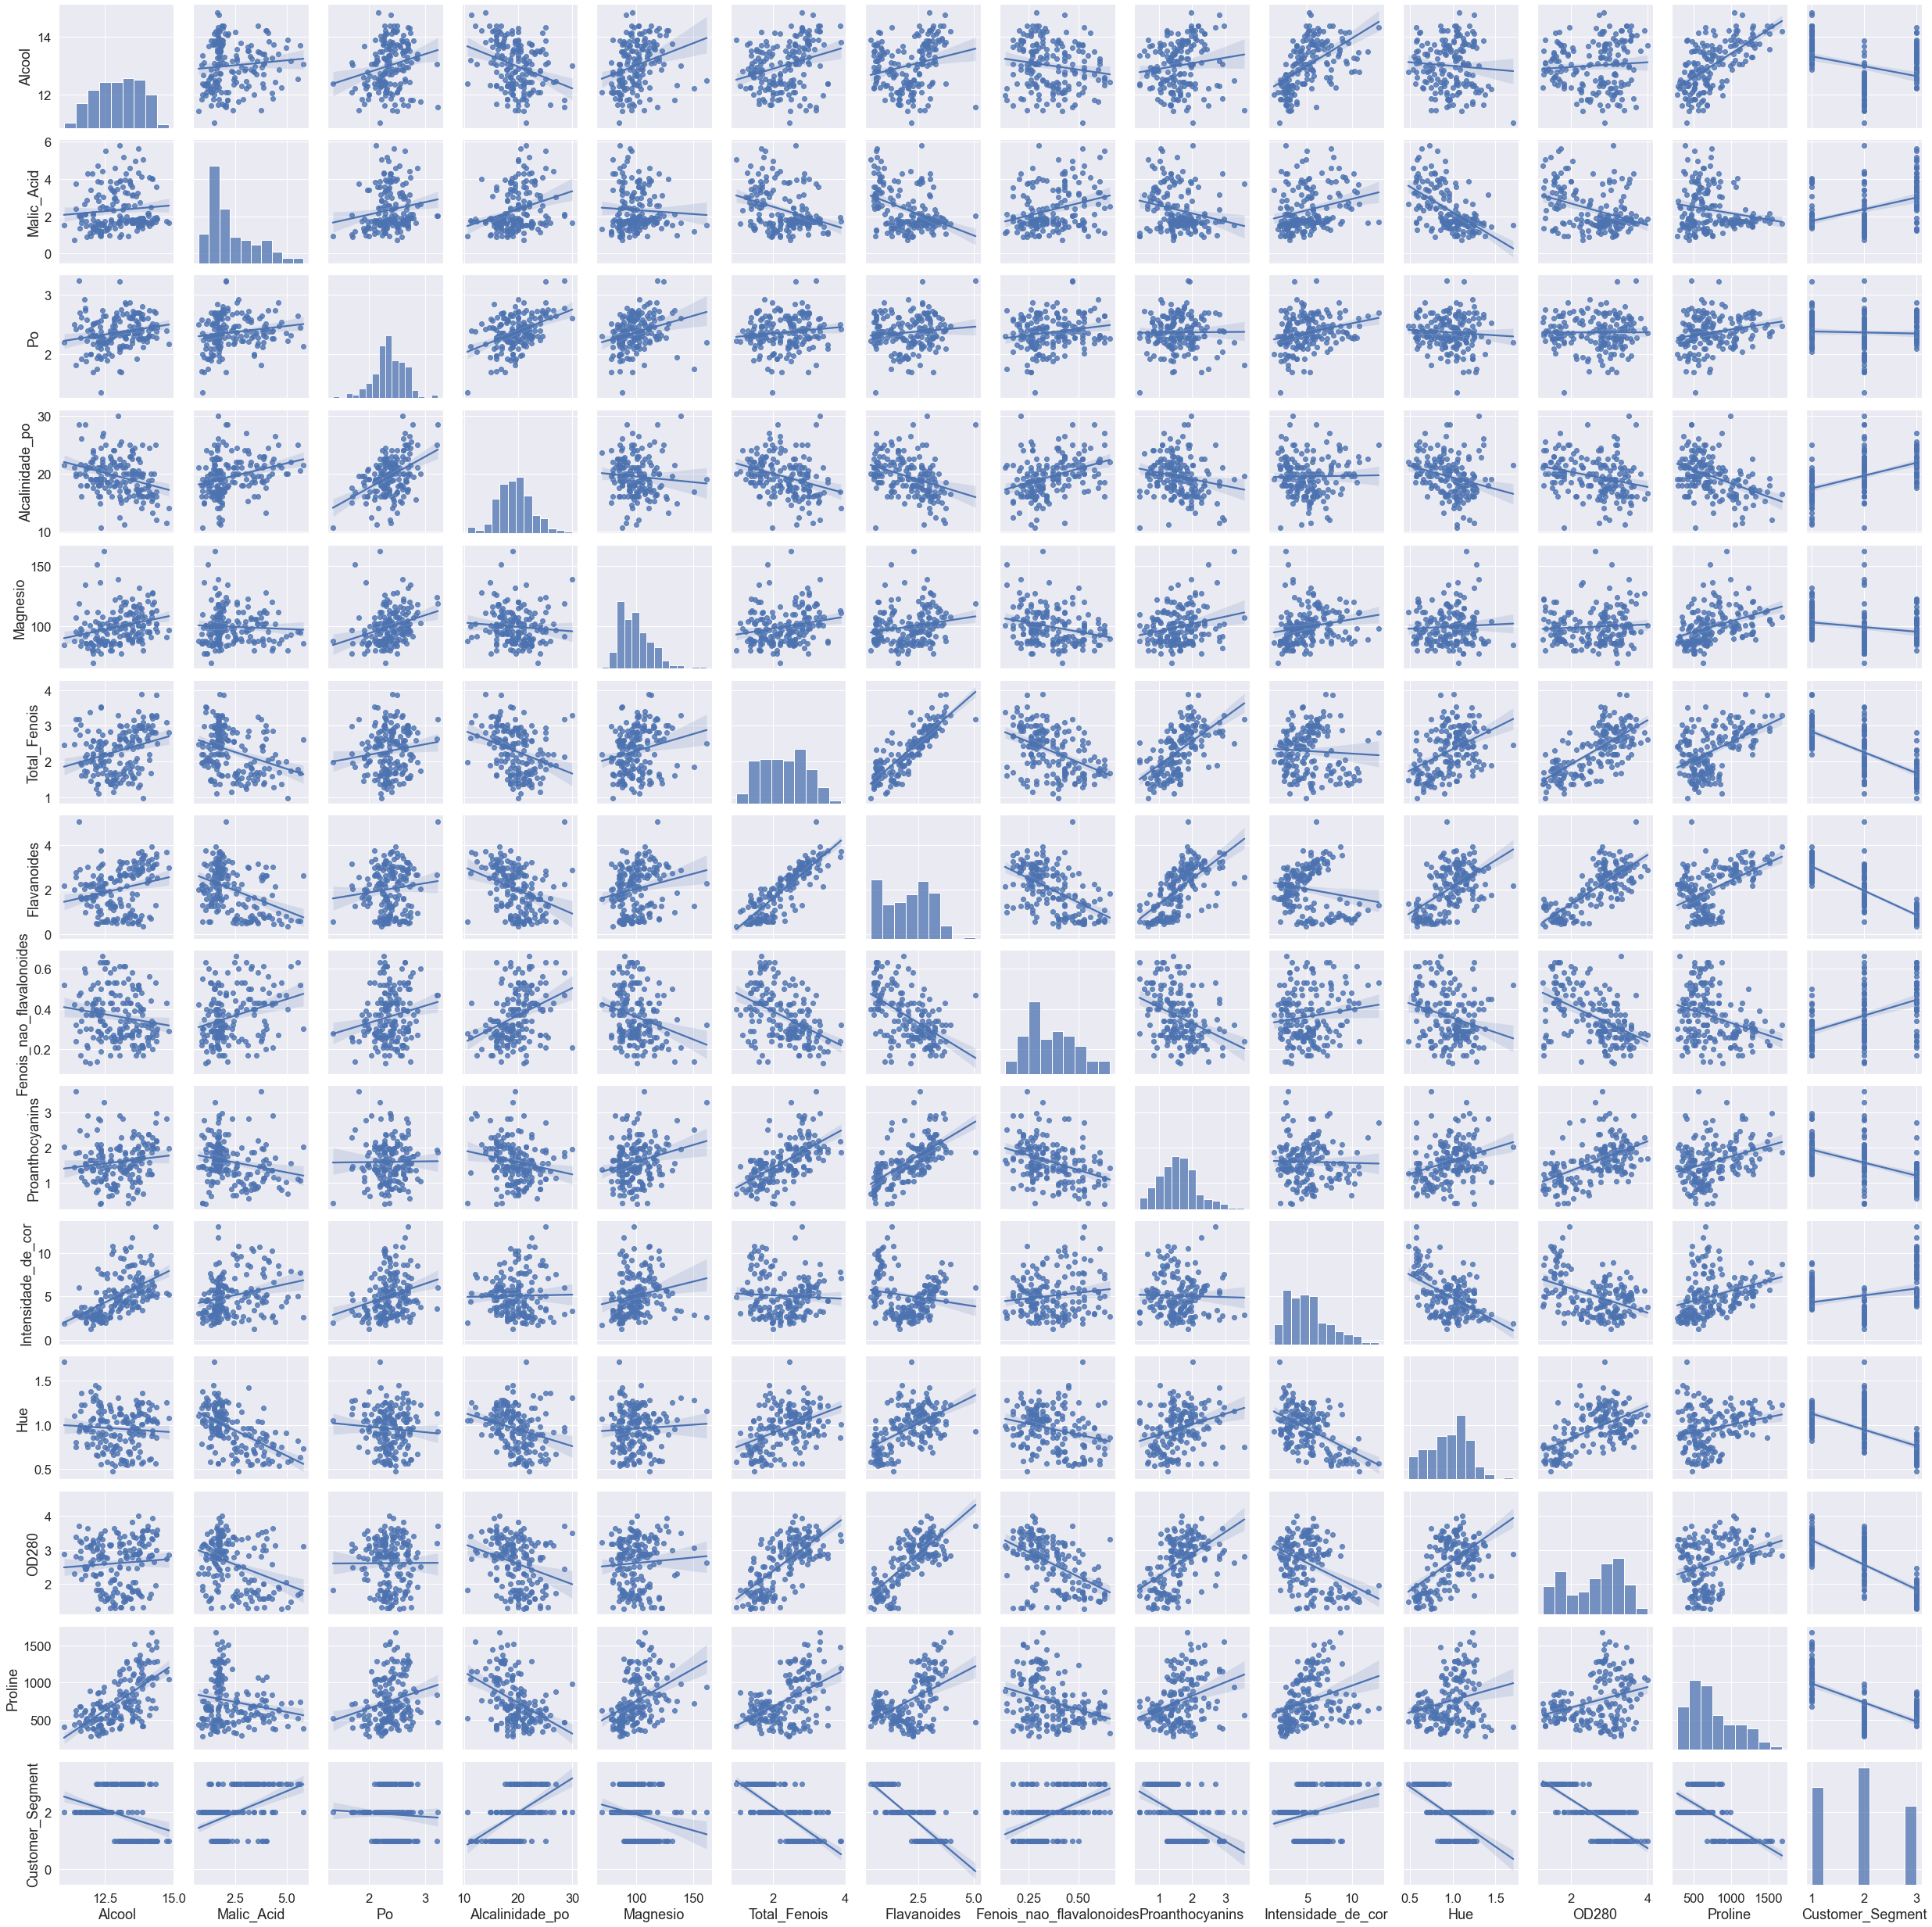

In [39]:
sns.set(font_scale = 1.5)
sns.pairplot(wine, kind = 'reg')

### Redução da dimensionalidade dos dados

In [40]:
# De acordo com a matriz de correlação e com os gráficos exibidos acima, iremos reduzir a dimensionalidade dos dados (para poupar poder de 
# armazenamento e processamento, além de reduzir dados redundantes, os quais podem prejudicar no desempenho dos modelos que serão implementados).

wine2 = wine.copy()
wine2.drop(columns = ['Flavanoides', 'Customer_Segment'], inplace = True)

### Normalização dos atributos (sklearn)

In [41]:
colunas = wine2.columns

min_max_scaller = preprocessing.MinMaxScaler()
np_wine = min_max_scaller.fit_transform(wine2)
wine2 = pd.DataFrame(np_wine, columns = colunas)
wine.describe() 

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoides,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


# K-MEANS

### Implementando o agrupador K-Means

In [42]:
# Não é indicado quando os clusters não possuem simetria radial.

from sklearn.cluster import KMeans

agrupador_km = KMeans(n_clusters = 4)
agrupador_km.fit(wine2)
labels = agrupador_km.labels_

# Como o resultado do algorítimo depende do ponto de início (aleatório), a cada vez que rodarmos o código os labels vão ser diferentes, mas
# os agrupamentos serão os mesmos.
print(labels)
print(pd.Series(labels).value_counts())

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 3 0 3 3 3 0 3 0 3 3 1
 3 0 3 0 3 3 3 3 3 2 3 3 0 3 0 3 0 0 0 3 3 1 3 3 3 3 3 3 3 3 3 0 3 0 3 3 3
 3 0 0 3 3 3 3 0 3 3 3 3 3 3 3 3 0 3 3 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
1    60
3    49
2    47
0    22
Name: count, dtype: int64


### Visualizando os clusters graficamente

In [43]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = wine2['Intensidade_de_cor'], y = wine2['Alcool'], 
              mode = 'markers', marker = dict(color = labels.astype(np.float)), text = agrupador_km.labels_))

fig.show()

# Os agrupamentos parecem se sobrepor pq estamos visualizando apenas 2 atributos do dataframe

C:\Users\joaop\AppData\Local\Temp\ipykernel_16964\1150520048.py:4: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [44]:
# Visualizando 3 atributos no mesmo gráfico:

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x = wine2['Intensidade_de_cor'],
    y = wine2['Alcool'],
    z = wine2['Proline'],
    mode = 'markers',
    marker = dict(color = labels.astype(np.float)),
    text = agrupador_km.labels_
))

fig.update_layout(scene = dict(
                    xaxis_title='Intensidade de Cor',
                    yaxis_title='Àlcool',
                    zaxis_title='Proline'))

centros = pd.DataFrame(agrupador_km.cluster_centers_)
centros.columns = wine2.columns

fig.add_trace(go.Scatter3d(
    x = centros['Intensidade_de_cor'],
    y = centros['Alcool'],
    z = centros['Proline'],
    mode = 'markers',
    marker = dict(color = 'red'),
    text = np.unique(agrupador_km.labels_)
))

fig.show()

C:\Users\joaop\AppData\Local\Temp\ipykernel_16964\3278317223.py:10: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



# DBSCAN

In [45]:
# É indicado para aplicações com ruído, e não é necessário informar o nº de clusters (o próprio algorítimo irá
# determinar isso de acordo com os hiperparâmetros definidos).

# Vantagens: robusto a outliers (ruído), pode detectar agrupamentos de qualquer formato, não pe muito custoso computacionalmente
# Desvantagens: a parametrização não é tão simples, não consegue identificar clusters de várias densidades (uma vez que min_samples 
# e eps são fixos) e não funciona muito bem com dados de alta dimensionalidade (já que as medidas de distância começam a perder sentido)
from sklearn.cluster import DBSCAN

agrupador_dbs = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan')
agrupador_dbs.fit(wine2)
print('Clusters encontrados:', np.unique(agrupador_dbs.labels_))
agrupador_dbs.labels_
# Labels -1: ruído

Clusters encontrados: [-1  0  1]


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0, -1,  0, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0, -1, -1, -1,
        0, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0,  0, -1,
        0,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1,  1,  1,  1, -1,  1,
       -1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,
        1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

### Visualização gráfica

In [46]:
graf = go.Figure()

graf.add_trace(go.Scatter(
    x = wine2['Intensidade_de_cor'], 
    y = wine2['Alcool'],
    mode = 'markers', 
    marker = dict(color = agrupador_dbs.labels_.astype(np.float)), 
    text = agrupador_dbs.labels_
))

fig.update_layout(
    xaxis_title = 'Intensidade de Cor',
    yaxis_title = 'Alcool'
)

graf.show()

C:\Users\joaop\AppData\Local\Temp\ipykernel_16964\2835114685.py:7: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [47]:
# Para o DBSCAN não é possível gerar o centro dos clusters

graf = go.Figure()

graf.add_trace(go.Scatter3d(
    x = wine['Intensidade_de_cor'],
    y = wine2['Alcool'],
    z = wine2['Proline'],
    mode = 'markers',
    marker = dict(color = agrupador_dbs.labels_.astype(np.float)),
    text = agrupador_dbs.labels_
))

graf.update_layout(scene = dict(
    xaxis_title = 'Intensidade de Cor',
    yaxis_title = 'Alcool',
    zaxis_title = 'Proline'
))

graf.show()

C:\Users\joaop\AppData\Local\Temp\ipykernel_16964\4130900421.py:10: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



# MEAN SHIFT

In [48]:
# Vantagens: Robusto a outliers,apenas 1 hiperparâmetro a ser parametrizado, identifica clusters de quaisquer formatos (quanto
# maior a bandwidth definida, mais radial será a forma dos agrupamentos) e não pe necessário informar um nº de clusters.

# Desvantagens: não funciona bem com dados de alta dimensionalidade (pois assim como o DBSCAN, o MeanShift também utiliza
# métricas de distância), computacionalmente caro

from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# Estimando a largura de banda: quanto maior o quantil, maior a região de busca e maior a BW (menor nº de clusters encontrados)
bw = estimate_bandwidth(wine2, quantile = 0.2)

agrupador_ms = MeanShift(bandwidth = bw)
agrupador_ms.fit(wine2)
print('Clusters encontrados:', np.unique(agrupador_ms.labels_))
print('Amostras por cluster:')
print(pd.Series(agrupador_ms.labels_).value_counts())
agrupador_ms.labels_

Clusters encontrados: [0 1 2 3]
Amostras por cluster:
0    107
1     64
2      5
3      2
Name: count, dtype: int64


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 0, 0, 3, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [49]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x = wine2['Intensidade_de_cor'],
    y = wine2['Alcool'],
    z = wine2['Proline'],
    mode = 'markers',
    marker = dict(color = agrupador_ms.labels_.astype(np.float)),
    text = agrupador_ms.labels_
))

centros = agrupador_ms.cluster_centers_
centros = pd.DataFrame(centros, columns = wine2.columns)

fig.add_trace(go.Scatter3d(
    x = centros['Intensidade_de_cor'],
    y = centros['Alcool'],
    z = centros['Proline'],
    mode = 'markers',
    marker = dict(color = 'red'),
    text = np.unique(agrupador_ms.labels_)
))

fig.update_layout(scene = dict(
    xaxis_title = 'Intensidade de Cor',
    yaxis_title = 'Alcool',
    zaxis_title = 'Proline'
))

fig.show()

C:\Users\joaop\AppData\Local\Temp\ipykernel_16964\3521891755.py:8: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



# AVALIANDO OS CLUSTERS FORMADOS

##### * COEFICIENTE DE SILHUETA: É uma métrica (não a única) que mostra o quão próximo os pontos de um cluster está próximo aos demais pontos de mesmo cluster e o quão distante ele está dos pontos de clusters diferentes. É um valor adimensional que varia entre -1 e 1 e é calculado para cada amostra, sendo determinado pela distância da mesma e dos outros dados do cluster, tal como a distância entre cada dado e o centróide do agrupamento a qual ela está alocada.

##### * ÍNDICES DE DAVIES-BOULDIN: É uma outra métrica de avaliação de clusters, similar ao coeficiente médio de silhueta. É determinado a partir da distância média entre as amostras de um cluster e a distância média dos centróides de agrupamentos distintos, resultando em uma métrica que indica o grau de similaridade de diferentes grupos. Idealmente, espera-se valores mais próximos de zero quanto seja possível (indicando similaridade nula entre os clusters).

##### * ÍNDICES DE CALINSKI-HARABASZ: É uma outra métrica de avaliação de clusters, sendo calculado a partir da distância entre uma amostra e o centróide de seu cluster e dos demais. Esse índice é sempre não negativo e não possui um limite superior, onde valores mais elevados indicam uma maior qualidade de agrupamento.

##### OBS1: algumas métricas não podem ser calculados quando n_clusters = 1 (não é possível determinar a dissimilaridade) ou quando n_clusters = nº de dados (não é possívle calcular a coesão).

##### OBS2: focaremos nossos esforços em otimizar os hiperparâmetros para que os modelos forneçam soluções que contenham entre 2 e 40 clusters, de modo a encontrar soluções mais razoáveis (evitando que os algorítmos proponham apenas um único grande cluster, ou mesmo que cada dado seja considerado um cluster diferente).

In [50]:
def plot_metrica(xdata, ydata, zdata, xlabel, ylabel, zlabel):
    fig = go.Figure()

    if zdata != []:
        fig.add_trace(go.Scatter3d(
            x = xdata,
            y = ydata,
            z = zdata
        ))

        fig.update_layout(scene = dict(
        xaxis_title = xlabel,
        yaxis_title = ylabel,
        zaxis_title = zlabel
))
    else:
        fig.add_trace(go.Scatter(
            x = xdata,
            y = ydata
        ))

        fig.update_layout(
            xaxis_title = xlabel,
            yaxis_title = ylabel
        )

    fig.show()

### Para o algorítimo K-Means

In [51]:
# Determinamos uma faixa de valores de teste para n_clusters (único hiperparâmetro do K-Means)
faixa_nclusters = [n for n in range(2, 41)]

valores_silhueta = []
valores_daviesBoudin = []
valores_calinskiHarabasz = []

for n in faixa_nclusters:
    
    agrupador = KMeans(n_clusters = n)
    labels = agrupador.fit_predict(wine2)
    
    valores_silhueta.append(silhouette_score(wine2, labels))
    valores_daviesBoudin.append(davies_bouldin_score(wine2, labels))
    valores_calinskiHarabasz.append(calinski_harabasz_score(wine2, labels))

plot_metrica(faixa_nclusters, valores_silhueta, [], 'Nº de Clusters', 'Coeficiente Médio de Silhueta', '')
plot_metrica(faixa_nclusters, valores_daviesBoudin, [], 'Nº de Clusters', 'Índice de Davies-Boudin', '')
plot_metrica(faixa_nclusters, valores_calinskiHarabasz, [], 'Nº de Clusters', 'Índice de Calinski-Harabasz', '')

# Para as 3 métricas utilizadas, nota-se que o modelo que proporciona a melhor qualidade de agrupamento, é aquele que utiliza como hiperparâmetro,
# n_clusters = 3.

### Para o algorítimo Mean Shift

In [52]:
# Determinamos uma faixa de valores de teste para o quantil (único hiperparâmetro do Mean Shift)
faixa_quantil = np.linspace(0.1, 1, 100)
quantil_plot = []
bw_plot = []

valores_silhueta = []
valores_daviesBoudin = []
valores_calinskiHarabasz = []

for q in faixa_quantil:
    
    faixa_bw = []
    BW_ = estimate_bandwidth(wine2, quantile = q)

    faixa_bw.append(0.5*BW_)
    faixa_bw.append(0.75*BW_)
    faixa_bw.append(BW_)
    faixa_bw.append(1.25*BW_)
    faixa_bw.append(1.5*BW_)
    
    for BW in faixa_bw:
        if((BW > 0) & (BW not in bw_plot)):
            agrupador = MeanShift(bandwidth = BW)
            labels = agrupador.fit_predict(wine2)

            if ((len(np.unique(labels)) > 1) & (len(np.unique(labels)) < 41)):

                bw_plot.append(BW)

                valores_silhueta.append(silhouette_score(wine2, labels))
                valores_daviesBoudin.append(davies_bouldin_score(wine2, labels))
                valores_calinskiHarabasz.append(calinski_harabasz_score(wine2, labels))

In [53]:
# Nota-se que o coeficiente de silhueta e o índice de calinski-harabasz apresentam resultados congruentes entre si, indicando que o melhor valor
# para a largura de banda é 0.7360. Contudo, o índice de davies-boudin diverege deste resultado. Podem ser tomadas duas medidas para determinar o 
# valor otimizado do quantil: 1) escolhe-se bw = 0.6535, uma vez que esta escolha nos proporciona valores medianos em cada uma das 3 métricas
# utilizadas (ótimo local), ou 2) podemos utilizar bw = 0.7360, que maximiza a maioria das métricas ou mesmo 3) bw = 0.5183, que maximiza o índice de 
# Davies-Boudin. Posteriormente, durante os testes de estabilidade dos das clusterizações, iremos decidir qual destes valores será escolhido.  

# Uma das explicações possíveis para esta divergência observada, seria que o mean shift é bastante sensível à escolha do valor de bandwidth 
# (a qual afeta o tamanho e formato dos agrupamentos) e pode convergir para uma solução de ótimo local, ao invés do ótimo global. Além disso,
# foi utilizada a função estimate_bandwidth, da própria biblioteca sklearn, o qual faz uma única estimativa para o valor da largura de banda 
# para cada valor proposto de q.

x = pd.DataFrame({'bw': bw_plot, 'cs': valores_silhueta, 'db': valores_daviesBoudin, 'ch': valores_calinskiHarabasz})
x.sort_values('bw', inplace = True)

plot_metrica(x.bw, x.cs, [], 'Bandwidth', 'Coeficiente Médio de Silhueta', '')
plot_metrica(x.bw, x.db, [], 'Bandwidth', 'Índice de Davies-Boudin', '')
plot_metrica(x.bw, x.ch, [], 'Bandwidth', 'Índice de Calinski-Harabasz', '')

### Para o algorítimo DBSCAN

In [54]:
# Definindo uma faixa de variação dos hiperparâmetros
faixa_eps = np.arange(1, 251, 5)
faixa_min_samples = np.arange(5, 101, 2)
metricas = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']

for metrica in metricas:

    eps_plot = []
    min_samples_plot = []

    valores_silhueta = []
    valores_daviesBoudin = []
    valores_calinskiHarabasz = []

    for e in faixa_eps:
        for ms in faixa_min_samples:

            agrupador = DBSCAN(eps = e, min_samples = ms, metric = metrica)
            labels = agrupador.fit_predict(wine2)
            
            if ((len(np.unique(labels)) > 1) & (len(np.unique(labels)) < 41)):

                eps_plot.append(e)
                min_samples_plot.append(ms)

                valores_silhueta.append(silhouette_score(wine2, labels))
                valores_daviesBoudin.append(davies_bouldin_score(wine2, labels))
                valores_calinskiHarabasz.append(calinski_harabasz_score(wine2, labels))

    print(f'\n\n{metrica}\n\n')
    plot_metrica(eps_plot, min_samples_plot, valores_silhueta, 'eps', 'min_sample', 'Coeficiente Médio de Silhueta')
    plot_metrica(eps_plot, min_samples_plot, valores_daviesBoudin, 'eps', 'min_sample', 'Índice de Davies-Boudin')
    plot_metrica(eps_plot, min_samples_plot, valores_calinskiHarabasz, 'eps', 'min_sample', 'Índice de Calinski-Harabasz')

# Assim como o mean shift, o dbscan apresentou divergência entre os resultados das 3 métricas utilizadas para avaliar a qualidade dos clusters
# formados. Isto pode ocorrer devido a sensibilidade que o algorítmo tem em relação aos valores de eps e min_samples, não é garantidamente capaz
# de localizar todos os clusters no dataset, e também pelo fato de ele não lidar bem com agrupamentos de densidades variáveis (como parece ser o
# caso, a partir das análises dos gráficos dos agrupamentos gerados nas definições iniciais de cada modelo).



cityblock






cosine






euclidean






l1






l2






manhattan




# ESTABILIDADE DOS MODELOS

##### Vamos medir agora o quão estáveis são os modelos propostos, considerando:

##### M1: K-Means, com n_clusters = 3
##### M2: Mean Shift, com bw = 0.5183
##### M3: Mean Shift, com bw = 0.6535
##### M4: Mean Shift, com bw = 0.7360
##### M5: DBScan, com eps = 1 e min_samples = 13
##### M6: DBScan, com eps = 1 e min_samples = 9
##### M7: DBScan, com eps = 1 e min_samples = 5

In [55]:
# Definindo os modelos de clusterização mais otimizados
m1 = KMeans(n_clusters = 3)
m2 = MeanShift(bandwidth = 0.5183)
m3 = MeanShift(bandwidth = 0.6535)
m4 = MeanShift(bandwidth = 0.7360)
m5 = DBSCAN(eps = 1, min_samples = 5,  metric = 'manhattan')
m6 = DBSCAN(eps = 1, min_samples = 9,  metric = 'manhattan')
m7 = DBSCAN(eps = 1, min_samples = 13, metric = 'manhattan')

modelos = [m1, m2, m3, m4, m5, m6, m7]

In [140]:
# Ordenando de forma alatória as linhas do dataframe
df = wine2.copy().sample(frac = 1)

# separando o dataset em 3 subconjuntos distintos
n = int(df.shape[0] / 3)
df1 = df[:n]
df2 = df[n: 2*n]
df3 = df[2*n:]

# Formato do dataframe que irá conter a variância das métricas de score de cada modelo, em cada subconjunto de dados 
df_out = pd.DataFrame({}, columns = ['Modelo', 'Métrica', 'Variância'])

for k in range(7):

    print('=====================================================================================')
    print(f'\nANALISANDO O MODELO M{k+1}\n')

    labels1 = modelos[k].fit_predict(df1)
    labels2 = modelos[k].fit_predict(df2)
    labels3 = modelos[k].fit_predict(df3)

    # Se foram determinados mais de um cluster para todos os subconjuntos, então avaliaremos o modelo. Caso contrário, ele será descartado.
    NL1 = len(np.unique(labels1))
    NL2 = len(np.unique(labels2))
    NL3 = len(np.unique(labels3))

    if((NL1 > 1) & (NL2 > 1) & (NL3 > 1)):

        print('Agrupamentos formados no subconjunto 1:', np.unique(labels1))
        print('Agrupamentos formados no subconjunto 2:', np.unique(labels2))
        print('Agrupamentos formados no subconjunto 3:', np.unique(labels3), '\n')

        sl1 = silhouette_score(df1, labels1)
        db1 = davies_bouldin_score(df1, labels1)
        ch1 = calinski_harabasz_score(df1, labels1)

        sl2 = silhouette_score(df2, labels2)
        db2 = davies_bouldin_score(df2, labels2)
        ch2 = calinski_harabasz_score(df2, labels2)

        sl3 = silhouette_score(df3, labels3)
        db3 = davies_bouldin_score(df3, labels3)
        ch3 = calinski_harabasz_score(df3, labels3)

        df_aux = pd.DataFrame({'Modelo': [k+1]*3, 
                            'Métrica': ['Silhueta', 'Davies-Boudin', 'Calinski-Harabaz'], 
                            'Variância': [np.var([sl1, sl2, sl3]), np.var([db1, db2, db3]), np.var([ch1, ch2, ch3])]})

        df_out = pd.concat([df_out, df_aux], ignore_index = True)
        print(df_out[['Métrica', 'Variância']][df_out['Modelo'] == k+1], '\n')

    else:
        print('Modelo descartado.')


ANALISANDO O MODELO M1

Agrupamentos formados no subconjunto 1: [0 1 2]
Agrupamentos formados no subconjunto 2: [0 1 2]
Agrupamentos formados no subconjunto 3: [0 1 2] 

            Métrica  Variância
0          Silhueta   0.000819
1     Davies-Boudin   0.005805
2  Calinski-Harabaz  22.706459 


ANALISANDO O MODELO M2

Agrupamentos formados no subconjunto 1: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Agrupamentos formados no subconjunto 2: [0 1 2 3 4 5 6 7 8]
Agrupamentos formados no subconjunto 3: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] 

            Métrica  Variância
3          Silhueta   0.002076
4     Davies-Boudin   0.002580
5  Calinski-Harabaz   6.618435 


ANALISANDO O MODELO M3

Agrupamentos formados no subconjunto 1: [0 1 2 3 4]
Agrupamentos formados no subconjunto 2: [0 1 2]
Agrupamentos formados no subconjunto 3: [0 1 2 3 4] 

            Métrica  Variância
6          Silhueta   0.006810
7     Davies-Boudin   0.014827
8  Calinski-Harabaz  30.90168

# CONCLUSÃO

##### Após executar diversas vezes a célula de código anterior, nota-se que o modelo M1 é o único que manteve a quantidade de clusters formados (uma vez que este é um parâmetro que foi determinado por nós ao implementar o modelo). Além disso, M1 também alcançou valores notoriamente baixos para a variância do Coeficiente de Silhueta e índice de Davies Bouding (da ordem de 10^-3 a 10^-4). Os modelos M2, M3 e M4 também alcançaram esta marca, entretanto, M2 não obteve resultados consistentes quanto à quantidade de agrupamentos formados, variando consideravelmente a cada execução.

##### Quanto a estabilidade, M1, M3 e M4 são os que mais se destacam. Por outro lado, quanto ao desempenho (medidas de score), M1 e M3 são os mais proeminentes. Enquanto para M1 as métricas de Silhueta, Davies-Bouding e Calinski-Harabaz convergem para o mesmo resultado (n_clusters = 3), em M4 há convergência de apenas 2 destas métricas. 

##### Podemos então concluir que o modelo M1, implementado com o algoritmo K-Means com n_clusters = 3 é o que proporciona uma melhor performance e estabilidade no agrupamento de dados, para o dataset em questão.  